In [1]:
import os
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import seaborn as sns
sns.set_style('white')
import dataframe_image as dfi
import pickle
from network_setup import *
from data_setup import *

from EnergyCommunityModel import *
from model_eval import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# set up home path
#home_path = os.getcwd()

In [2]:
# set up simulation scope
input_cdir_timestamp = '2022 11 09 10h46m56s'
with open('2022_11_13_filepaths.pickle', 'rb') as handle:
    paths = pickle.load(handle)
date_t = '2022 12 09 10h00m'
n_steps = 5

# define comprehensive scenario settings for analysis
scenario_sc0 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [False]}
scenario_sc1 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_sc2 = {'seasons': ['summer', 'winter'], 'p2p_options': [True], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_dict = {'scenario_0': scenario_sc0, 'scenario_1': scenario_sc1, 'scenario_2': scenario_sc2}

# manually define all scenarios
scenario_0 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [False]}
scenario_1 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [False]}
scenario_2 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [False]}
scenario_3 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [False]}

scenario_4 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_5 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_6 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [True]}
scenario_7 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [True]}

scenario_8 = {'seasons': ['summer'], 'p2p_options': [True], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_9 = {'seasons': ['winter'], 'p2p_options': [True], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_10 = {'seasons': ['summer'], 'p2p_options': [True], 'pr_years': [2022], 'pr_dynamic_options': [True]}
scenario_11 = {'seasons': ['winter'], 'p2p_options': [True], 'pr_years': [2022], 'pr_dynamic_options': [True]}
all_scs = [scenario_0, scenario_1, scenario_2, scenario_3, scenario_4, scenario_5, scenario_6, scenario_7, scenario_8, scenario_9, scenario_10, scenario_11]

In [3]:
batch_runner(paths, sc_dict=scenario_11, n_steps=n_steps, input_cdir_timestamp=input_cdir_timestamp, output_dir_timestamp=date_t)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-31
--- START: 2022 12 09 10h00m_mdf,adf_season_winter_p2p_True_year_2022_dyn_True
--- Step 0/5 done. Time: 0:00:14. mean(n_d_share): 1.0, mean(n_s_share): 1.0 ---
--- Step 1/5 done. Time: 0:00:13. mean(n_d_share): 0.99, mean(n_s_share): 1.0 ---
--- Step 2/5 done. Time: 0:00:14. mean(n_d_share): 0.98, mean(n_s_share): 1.0 ---
--- Step 3/5 done. Time: 0:00:13. mean(n_d_share): 0.97, mean(n_s_share): 1.0 ---
--- Step 4/5 done. Time: 0:00:14. mean(n_d_share): 0.96, mean(n_s_share): 1.0 ---
--- SUCCESS: 2022 12 09 10h00m_mdf,adf_season_winter_p2p_True_year_2022_dyn_True stored. Total simulation time: 0:01:43 ---


In [5]:
mdf, adf = get_quick_mdf(paths, date_t, scenario_dict_sc=scenario_11, adf_too=True)
mdf

,price_g_d,price_g_s,price_n_level,price_n_d,price_n_s,costs_all,costs_prosumer,costs_consumer,costs_gini,g_d_all,...,hb_c_all,hb_d_all,ev_soc_all,ev_c_all,ev_d_all,mean_dci_all,mean_dci_prosumer,mean_dci_consumer,mean_n_d_share,mean_n_s_share
2022-01-15 00:00:00,41.19100,6.93,0 14.756100 1 19.960698 2 25.165296 3...,40.779090,33.099090,17.695298,8.859687,8.835611,0.256945,0.429591,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,1.000000,0.0,1.0
2022-01-15 00:15:00,40.76775,6.93,0 14.756100 1 19.876894 2 24.997689 3...,40.360073,32.680073,19.234284,9.008853,10.225432,0.248035,0.471801,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,1.000000,0.0,1.0
2022-01-15 00:30:00,40.34450,6.93,0 14.756100 1 19.793091 2 24.830082 3...,39.941055,32.261055,22.361022,10.208181,12.152842,0.259679,0.554252,...,0.0,0.0,0.0,0.0,0.0,0.979106,1.0,0.961196,0.0,1.0
2022-01-15 00:45:00,39.92125,6.93,0 14.756100 1 19.709288 2 24.662475 3...,39.522038,31.842038,35.081278,22.569175,12.512103,0.338212,0.878762,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,1.000000,0.0,1.0
2022-01-15 01:00:00,39.49800,6.93,0 14.756100 1 19.625484 2 24.494868 3...,39.103020,31.423020,53.513801,24.900448,28.613352,0.430762,1.354848,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,1.000000,0.0,1.0


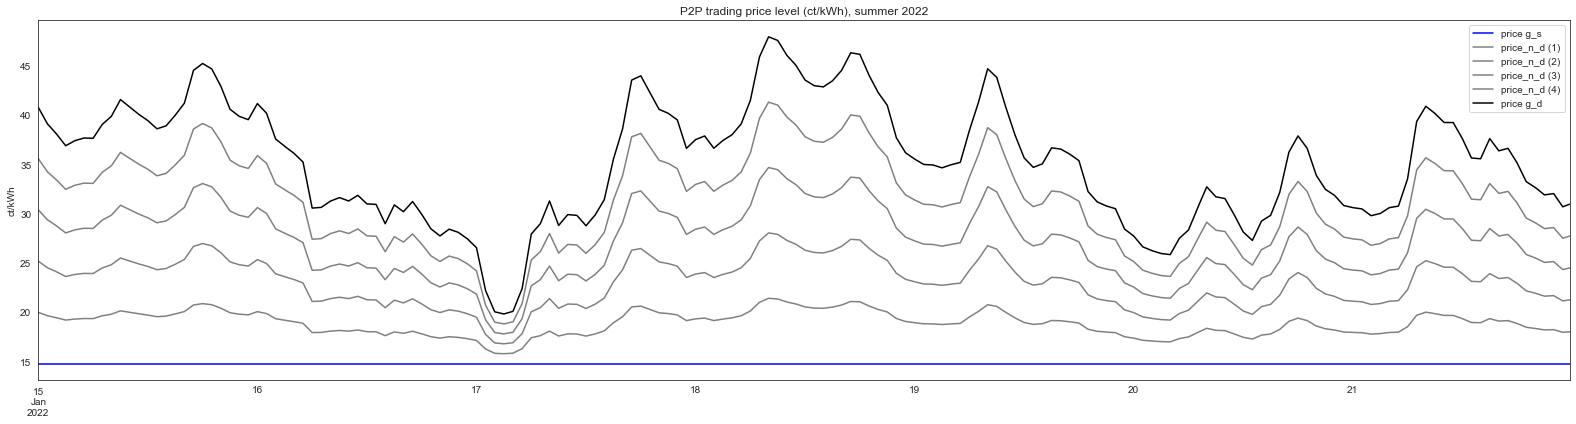

In [43]:
l = mdf.price_n_level.tolist()
ind = mdf.index
dfs = []
for i in range(6):
    dfs.append(pd.DataFrame([j[i] for j in l], index=ind))
df = pd.concat(dfs, axis=1)
df.columns = ['price g_s', 'price_n_d (1)', 'price_n_d (2)', 'price_n_d (3)', 'price_n_d (4)', 'price g_d']

fig, ax = plt.subplots(figsize = (22,6))
df.plot(ax = ax, title='P2P trading price level (ct/kWh), summer 2022', color = ['blue', 'grey', 'grey','grey','grey', 'black'])
ax.set_ylabel('ct/kWh')
plt.tight_layout()
plt.show()

---

In [3]:
model = create_model(paths, input_cdir_timestamp, scenario_t = scenario_8)
model

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-31


In [4]:
for a in model.schedule.agents:
    a.update_data()
    a.update_hems()
# calculate p2p trading price levels
model.n_price_levels = model.calculate_p2p_price_levels()
model.n_volumes, n_max_volumes, model.n_welfare = dict(), dict(), dict()
i = range(model.nr_n_equilibrium_price_levels)[2]
model.n_d_price_t = model.n_price_levels.iloc[:, i]
model.n_s_price_t = model.n_d_price_t - \
    model.database.optimization_parameter['grid_fees']
# run agents' optimization, track results, and cumulate p2p buying and selling volumes
a_n_d_volumes, a_n_s_volumes = np.zeros(
    len(model.time_index)), np.zeros(len(model.time_index))

In [ ]:
a = model.schedule.agents[1]
rti = list(range(len(a.model.time_index)))
a.price_n_d, a.price_n_s = a.model.n_d_price_t, a.model.n_s_price_t
n_d_prospective_share, n_s_prospective_share = np.mean(list(a.n_d_share_tracker)), np.mean(list(a.n_s_share_tracker))

In [6]:
a = model.schedule.agents[1]
rti = list(range(len(a.model.time_index)))
a.price_n_d, a.price_n_s = a.model.n_d_price_t, a.model.n_s_price_t
n_d_prospective_share, n_s_prospective_share = np.mean(list(a.n_d_share_tracker)), np.mean(list(a.n_s_share_tracker))

a.m.setObjective(gp.quicksum(
    a.price_g_d[i] * a.g_d[i] - a.price_g_s[i] * a.g_s[i] + a.price_n_d[i] * a.n_d[i] -
    a.price_n_s[i] * a.n_s[i] + a.lcoe_pv * a.pv[i] + a.lcoe_hb * a.hb_c[i] + a.lcoe_hb *
    a.hb_d[i] + a.lcoe_ev * a.ev_c[i] + a.lcoe_ev * a.ev_d[i] if i < 1 else a.price_g_d[i] * a.g_d[i] - a.price_g_s[i] * a.g_s[i] + a.price_n_d[i] * (n_d_prospective_share * a.n_d[i]) -
    a.price_n_s[i] * (n_s_prospective_share * a.n_s[i]) + a.lcoe_pv * a.pv[i] + a.lcoe_hb * a.hb_c[i] + a.lcoe_hb *
    a.hb_d[i] + a.lcoe_ev * a.ev_c[i] + a.lcoe_ev * a.ev_d[i] for i in rti),
    GRB.MINIMIZE)
a.m.Params.OutputFlag = 1

Set parameter OutputFlag to value 1


In [ ]:
a.m.optimize()

In [ ]:
[i for i in a.m.getVars() if '[0]' in i.VarName]

---

In [ ]:
scenario_t = scenario_0
batch_runner(paths, sc_dict=scenario_t, n_steps = n_steps, input_cdir_timestamp=input_cdir_timestamp, output_dir_timestamp=date_t)

In [ ]:
scenario_t = scenario_8
batch_runner(paths, sc_dict=scenario_t, n_steps = n_steps, input_cdir_timestamp=input_cdir_timestamp, output_dir_timestamp=date_t)

In [29]:
mdf, adf = get_quick_mdf(paths, '2022 11 22 21h00m', scenario_dict_sc=scenario_8, adf_too=True)

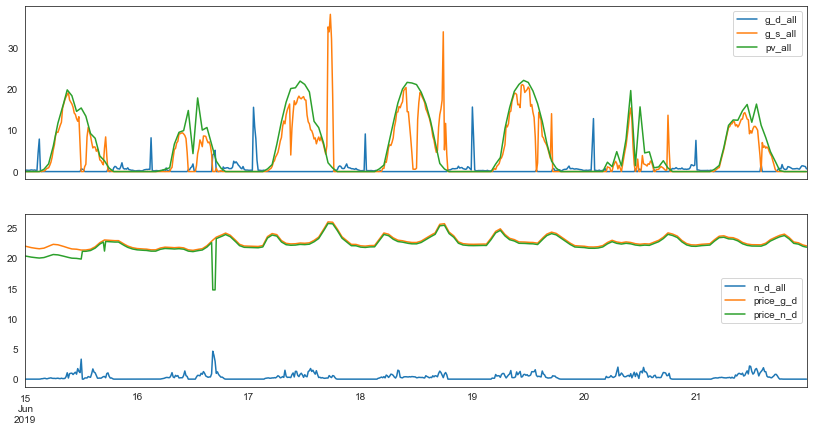

In [45]:
fig, ax = plt.subplots(figsize = (14,7), nrows = 2, sharex=True)
mdf[['g_d_all', 'g_s_all', 'pv_all']].plot(ax = ax[0])
mdf[['n_d_all', 'price_g_d', 'price_n_d']].plot(ax = ax[1])
plt.show()

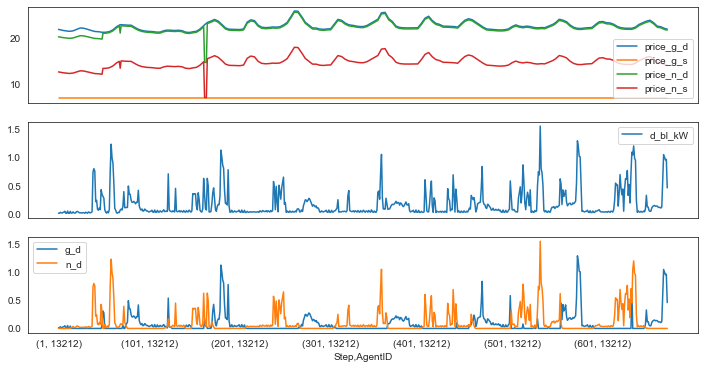

In [54]:
fig, ax = plt.subplots(figsize = (12,6), nrows=3, sharex=True)
adf_[['price_g_d', 'price_g_s', 'price_n_d', 'price_n_s']].plot(ax = ax[0])
adf_[['d_bl_kW']].plot(ax = ax[1])
adf_[['g_d', 'n_d']].plot(ax = ax[2])
plt.show()

,"sc0: 2022, winter","sc1: 2022, winter","sc2: 2022, winter"
total kgCO2e_all,359.131422,342.611959,304.672554
total_kgCO2e_prosumer,142.555011,137.677937,138.864248
total_kgCO2e_consumer,216.576412,204.934022,165.808306
mean_CO2e_gini,0.282208,0.269504,0.263727


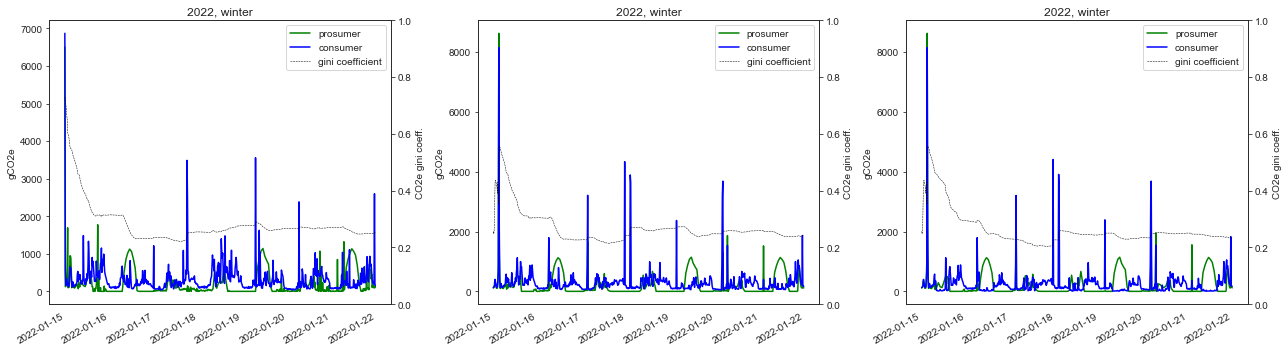

In [50]:
sc_dict, measure = [scenario_3, scenario_7, scenario_11], 'sustainability'
fig = plot_three_scenarios(paths, date_t, scenarios=sc_dict, measure=measure)
df = get_quick_measure_kpis(paths, date_t, scenarios = sc_dict, measure = measure)
df

In [26]:
mdf = get_quick_mdf(paths, date_t, scenario_dict_sc=scenario_11)
df = calculate_stability_measures(mdf)
df

,net_grid_demand,autarky_level
count,672.00,672.00
mean,-1.01,2.82
std,5.17,8.65
max,31.13,50.81
sum,-680.81,0.00


In [102]:
# calculate certain measure for certain scenario and save df as png
m_dict = calculate_measure(paths, date_t, scenario_dict=scenario_2, measure='welfare')
#export_measure_calculation(paths, m_dict)

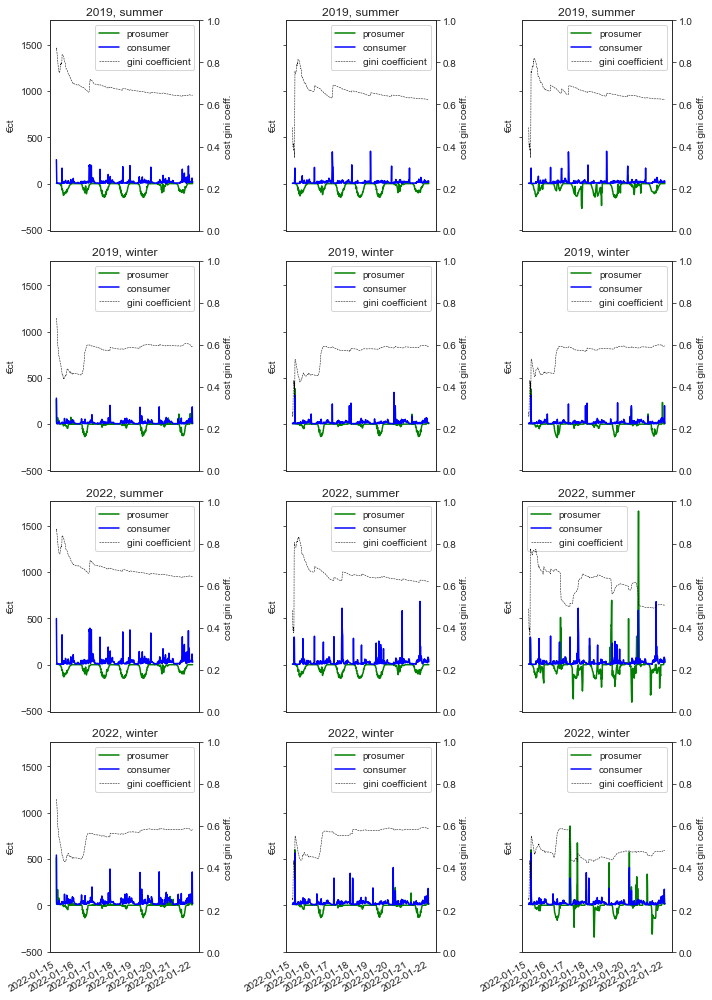

In [103]:
fig, ax = plot_all_scenarios(paths, date_t, scenario_dict, measure='welfare')

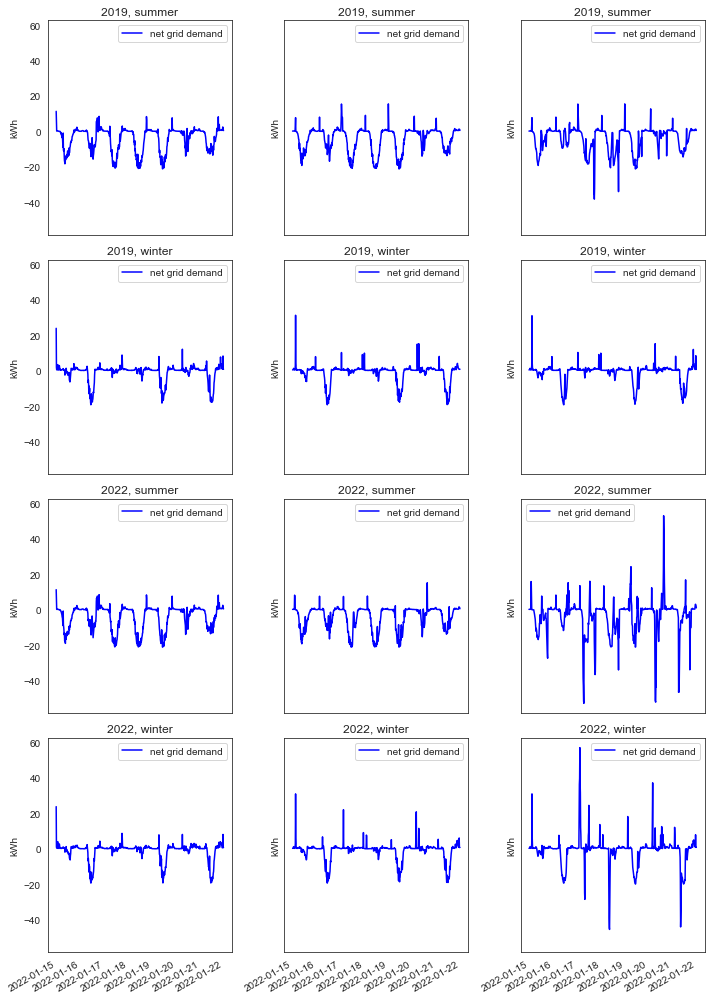

In [104]:
fig, ax = plot_all_scenarios(paths, date_t, scenario_dict, measure='stability')

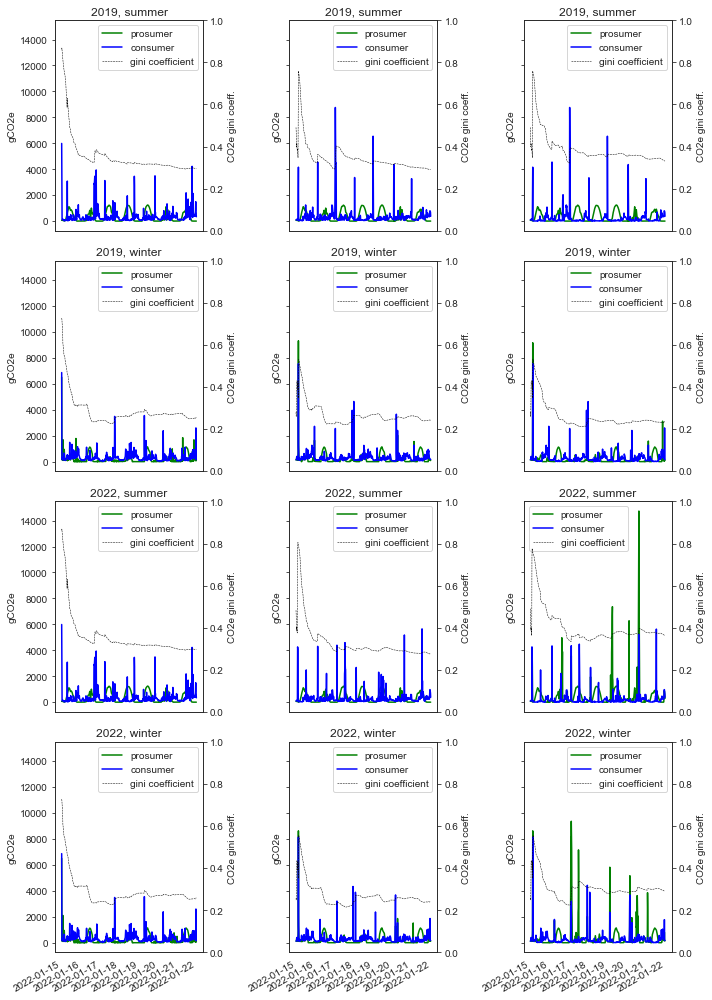

In [105]:
fig, ax = plot_all_scenarios(paths, date_t, scenario_dict, measure='sustainability')